# Project

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import random
import numpy as np
import pandas as pd
pd.options.display.max_rows = 20

## Reading In The Data

This data was retrieved from the UN open data website using the Energy Statistics Database, which was created by the United Nations Statistics Division (UNSD)

In [25]:
df_gross = pd.read_csv('Gross.csv').round(2)
df_hydro = pd.read_csv('Hydro.csv').round(2)
df_nuclear = pd.read_csv('Nuclear.csv').round(2)
df_solar = pd.read_csv('Solar.csv').round(2)
df_wind = pd.read_csv('Wind.csv').round(2)

display(df_gross)
display(df_hydro)


,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Afghanistan,Electricity - Gross production,2019.0,"Kilowatt-hours, million",1591.50,NaN
1,Afghanistan,Electricity - Gross production,2018.0,"Kilowatt-hours, million",1265.72,NaN
2,Afghanistan,Electricity - Gross production,2017.0,"Kilowatt-hours, million",1420.04,NaN
3,Afghanistan,Electricity - Gross production,2016.0,"Kilowatt-hours, million",1393.90,NaN
4,Afghanistan,Electricity - Gross production,2015.0,"Kilowatt-hours, million",1338.70,NaN
...,...,...,...,...,...,...
6646,Zimbabwe,Electricity - Gross production,1992.0,"Kilowatt-hours, million",8237.00,NaN
6647,Zimbabwe,Electricity - Gross production,1991.0,"Kilowatt-hours, million",8886.00,NaN
6648,Zimbabwe,Electricity - Gross production,1990.0,"Kilowatt-hours, million",9362.00,NaN
6649,fnSeqID,Footnote,NaN,NaN,NaN,NaN


,Country or Area,Commodity - Transaction,Year,Unit,Quantity,Quantity Footnotes
0,Afghanistan,Electricity - total hydro production,2019.0,"Kilowatt-hours, million",1388.04,NaN
1,Afghanistan,Electricity - total hydro production,2018.0,"Kilowatt-hours, million",1065.79,NaN
2,Afghanistan,Electricity - total hydro production,2017.0,"Kilowatt-hours, million",1243.78,NaN
3,Afghanistan,Electricity - total hydro production,2016.0,"Kilowatt-hours, million",1239.20,NaN
4,Afghanistan,Electricity - total hydro production,2015.0,"Kilowatt-hours, million",1189.50,NaN
...,...,...,...,...,...,...
4553,Zimbabwe,Electricity - total hydro production,1992.0,"Kilowatt-hours, million",3161.00,NaN
4554,Zimbabwe,Electricity - total hydro production,1991.0,"Kilowatt-hours, million",3114.00,NaN
4555,Zimbabwe,Electricity - total hydro production,1990.0,"Kilowatt-hours, million",4369.00,NaN
4556,fnSeqID,Footnote,NaN,NaN,NaN,NaN


#### Cleaning The Data

In [26]:
df_gross = df_gross.drop('Quantity Footnotes', axis = 1)
df_gross = df_gross.drop([df_gross.shape[0] - 1, df_gross.shape[0] - 2])
df_gross['Year'] = df_gross['Year'].astype(int)


df_hydro = df_hydro.drop('Quantity Footnotes', axis = 1)
df_hydro = df_hydro.drop([df_hydro.shape[0] - 1, df_hydro.shape[0] - 2])
df_hydro['Year'] = df_hydro['Year'].astype(int)

df_nuclear = df_nuclear.drop('Quantity Footnotes', axis = 1)
df_nuclear = df_nuclear.drop([df_nuclear.shape[0] - 1, df_nuclear.shape[0] - 2])
df_nuclear['Year'] = df_nuclear['Year'].astype(int)

df_solar = df_solar.drop('Quantity Footnotes', axis = 1)
df_solar = df_solar.drop([df_solar.shape[0] - 1, df_solar.shape[0] - 2])
df_solar['Year'] = df_solar['Year'].astype(int)

df_wind = df_wind.drop('Quantity Footnotes', axis = 1)
df_wind = df_wind.drop([df_wind.shape[0] - 1, df_wind.shape[0] - 2])
df_wind['Year'] = df_wind['Year'].astype(int)

df_gross = df_gross.rename(columns={'Quantity' : 'Gross Quantity'})
df_hydro = df_hydro.rename(columns={'Quantity': ('Hydro Quantity')})
df_nuclear = df_nuclear.rename(columns={'Quantity': ('Nuclear Quantity')})
df_solar = df_solar.rename(columns={'Quantity': ('Solar Quantity')})
df_wind = df_wind.rename(columns={'Quantity': ('Wind Quantity')})
print("Dataframe after cleaning:")
display(df_hydro, df_gross)

Dataframe after cleaning:


,Country or Area,Commodity - Transaction,Year,Unit,Hydro Quantity
0,Afghanistan,Electricity - total hydro production,2019,"Kilowatt-hours, million",1388.04
1,Afghanistan,Electricity - total hydro production,2018,"Kilowatt-hours, million",1065.79
2,Afghanistan,Electricity - total hydro production,2017,"Kilowatt-hours, million",1243.78
3,Afghanistan,Electricity - total hydro production,2016,"Kilowatt-hours, million",1239.20
4,Afghanistan,Electricity - total hydro production,2015,"Kilowatt-hours, million",1189.50
...,...,...,...,...,...
4551,Zimbabwe,Electricity - total hydro production,1994,"Kilowatt-hours, million",2375.00
4552,Zimbabwe,Electricity - total hydro production,1993,"Kilowatt-hours, million",2062.00
4553,Zimbabwe,Electricity - total hydro production,1992,"Kilowatt-hours, million",3161.00
4554,Zimbabwe,Electricity - total hydro production,1991,"Kilowatt-hours, million",3114.00


,Country or Area,Commodity - Transaction,Year,Unit,Gross Quantity
0,Afghanistan,Electricity - Gross production,2019,"Kilowatt-hours, million",1591.50
1,Afghanistan,Electricity - Gross production,2018,"Kilowatt-hours, million",1265.72
2,Afghanistan,Electricity - Gross production,2017,"Kilowatt-hours, million",1420.04
3,Afghanistan,Electricity - Gross production,2016,"Kilowatt-hours, million",1393.90
4,Afghanistan,Electricity - Gross production,2015,"Kilowatt-hours, million",1338.70
...,...,...,...,...,...
6644,Zimbabwe,Electricity - Gross production,1994,"Kilowatt-hours, million",7815.00
6645,Zimbabwe,Electricity - Gross production,1993,"Kilowatt-hours, million",7468.00
6646,Zimbabwe,Electricity - Gross production,1992,"Kilowatt-hours, million",8237.00
6647,Zimbabwe,Electricity - Gross production,1991,"Kilowatt-hours, million",8886.00


#### Leaders In Energy Production

In [27]:
def getLeaders(df, s):
    return df[df['Year'] == 2018].sort_values(s + ' Quantity', ascending=False).head(10).reset_index(drop=True)


df_gross_leaders = getLeaders(df_gross, 'Gross')
df_hydro_leaders = getLeaders(df_hydro, 'Hydro')
df_nuclear_leaders = getLeaders(df_nuclear, 'Nuclear')
df_solar_leaders = getLeaders(df_solar, 'Solar')
df_wind_leaders = getLeaders(df_wind, 'Wind')



display(df_gross_leaders)
display(df_hydro_leaders)
display(df_nuclear_leaders)
display(df_solar_leaders)
display(df_wind_leaders)

,Country or Area,Commodity - Transaction,Year,Unit,Gross Quantity
0,China,Electricity - Gross production,2018,"Kilowatt-hours, million",7166133.00
1,United States,Electricity - Gross production,2018,"Kilowatt-hours, million",4455439.00
2,India,Electricity - Gross production,2018,"Kilowatt-hours, million",1521785.00
3,Russian Federation,Electricity - Gross production,2018,"Kilowatt-hours, million",1115093.19
4,Japan,Electricity - Gross production,2018,"Kilowatt-hours, million",1057755.00
5,Canada,Electricity - Gross production,2018,"Kilowatt-hours, million",654399.00
6,Germany,Electricity - Gross production,2018,"Kilowatt-hours, million",643159.00
7,Brazil,Electricity - Gross production,2018,"Kilowatt-hours, million",601396.00
8,"Korea, Republic of",Electricity - Gross production,2018,"Kilowatt-hours, million",590108.00
9,France,Electricity - Gross production,2018,"Kilowatt-hours, million",581943.00


,Country or Area,Commodity - Transaction,Year,Unit,Hydro Quantity
0,China,Electricity - total hydro production,2018,"Kilowatt-hours, million",1231787.00
1,Brazil,Electricity - total hydro production,2018,"Kilowatt-hours, million",388971.00
2,Canada,Electricity - total hydro production,2018,"Kilowatt-hours, million",385951.00
3,United States,Electricity - total hydro production,2018,"Kilowatt-hours, million",317004.00
4,Russian Federation,Electricity - total hydro production,2018,"Kilowatt-hours, million",193027.31
5,Norway,Electricity - total hydro production,2018,"Kilowatt-hours, million",139509.00
6,India,Electricity - total hydro production,2018,"Kilowatt-hours, million",134991.00
7,Japan,Electricity - total hydro production,2018,"Kilowatt-hours, million",88348.00
8,Viet Nam,Electricity - total hydro production,2018,"Kilowatt-hours, million",84205.00
9,France,Electricity - total hydro production,2018,"Kilowatt-hours, million",70590.00


,Country or Area,Commodity - Transaction,Year,Unit,Nuclear Quantity
0,United States,Electricity - total nuclear production,2018,"Kilowatt-hours, million",841329.00
1,France,Electricity - total nuclear production,2018,"Kilowatt-hours, million",412942.00
2,China,Electricity - total nuclear production,2018,"Kilowatt-hours, million",294359.00
3,Russian Federation,Electricity - total nuclear production,2018,"Kilowatt-hours, million",204569.14
4,"Korea, Republic of",Electricity - total nuclear production,2018,"Kilowatt-hours, million",133505.00
5,Canada,Electricity - total nuclear production,2018,"Kilowatt-hours, million",100731.00
6,Ukraine,Electricity - total nuclear production,2018,"Kilowatt-hours, million",84398.00
7,Germany,Electricity - total nuclear production,2018,"Kilowatt-hours, million",76005.00
8,Sweden,Electricity - total nuclear production,2018,"Kilowatt-hours, million",68549.00
9,United Kingdom,Electricity - total nuclear production,2018,"Kilowatt-hours, million",65064.00


,Country or Area,Commodity - Transaction,Year,Unit,Solar Quantity
0,China,Electricity - total solar production,2018,"Kilowatt-hours, million",177517.0
1,United States,Electricity - total solar production,2018,"Kilowatt-hours, million",85184.0
2,Japan,Electricity - total solar production,2018,"Kilowatt-hours, million",62668.0
3,Germany,Electricity - total solar production,2018,"Kilowatt-hours, million",45784.0
4,India,Electricity - total solar production,2018,"Kilowatt-hours, million",39728.0
5,Italy,Electricity - total solar production,2018,"Kilowatt-hours, million",22654.0
6,United Kingdom,Electricity - total solar production,2018,"Kilowatt-hours, million",12858.0
7,Spain,Electricity - total solar production,2018,"Kilowatt-hours, million",12744.0
8,France,Electricity - total solar production,2018,"Kilowatt-hours, million",10569.0
9,Australia,Electricity - total solar production,2018,"Kilowatt-hours, million",9929.0


,Country or Area,Commodity - Transaction,Year,Unit,Wind Quantity
0,China,Electricity - total wind production,2018,"Kilowatt-hours, million",365971.0
1,United States,Electricity - total wind production,2018,"Kilowatt-hours, million",275834.0
2,Germany,Electricity - total wind production,2018,"Kilowatt-hours, million",109951.0
3,India,Electricity - total wind production,2018,"Kilowatt-hours, million",64294.0
4,United Kingdom,Electricity - total wind production,2018,"Kilowatt-hours, million",56904.0
5,Spain,Electricity - total wind production,2018,"Kilowatt-hours, million",50896.0
6,Brazil,Electricity - total wind production,2018,"Kilowatt-hours, million",48475.0
7,Canada,Electricity - total wind production,2018,"Kilowatt-hours, million",33183.0
8,France,Electricity - total wind production,2018,"Kilowatt-hours, million",28600.0
9,Turkey,Electricity - total wind production,2018,"Kilowatt-hours, million",19949.0


## Visualizing The Data 

#### Visualizing The Leaders In Energy Production

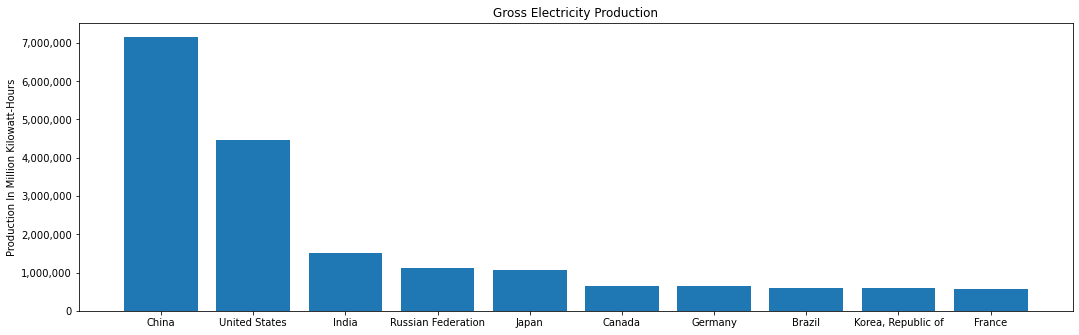

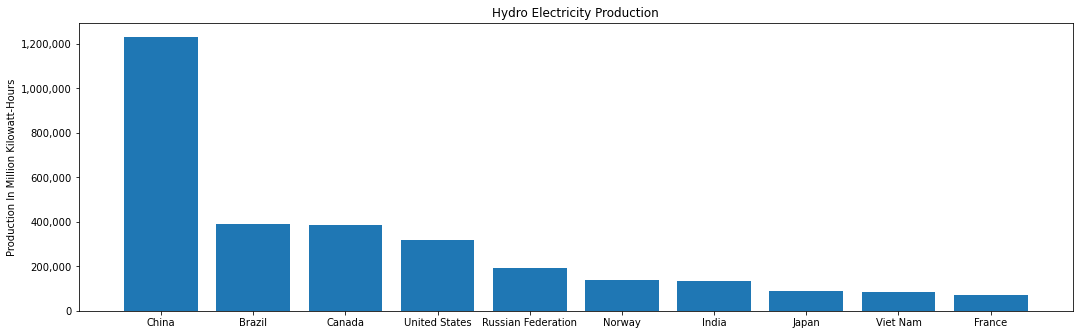

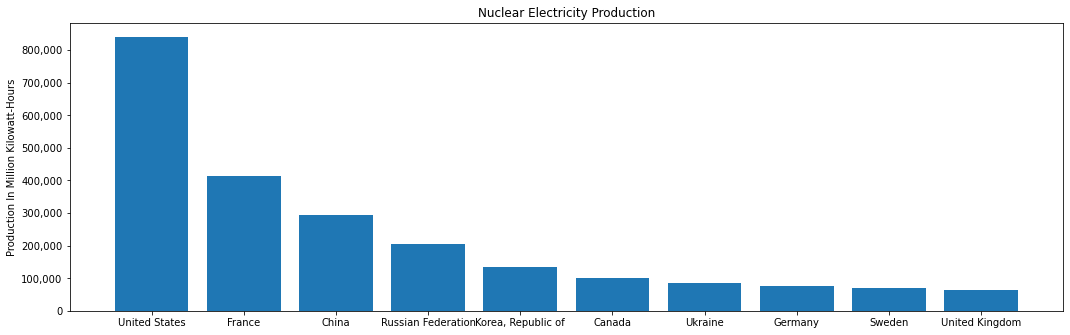

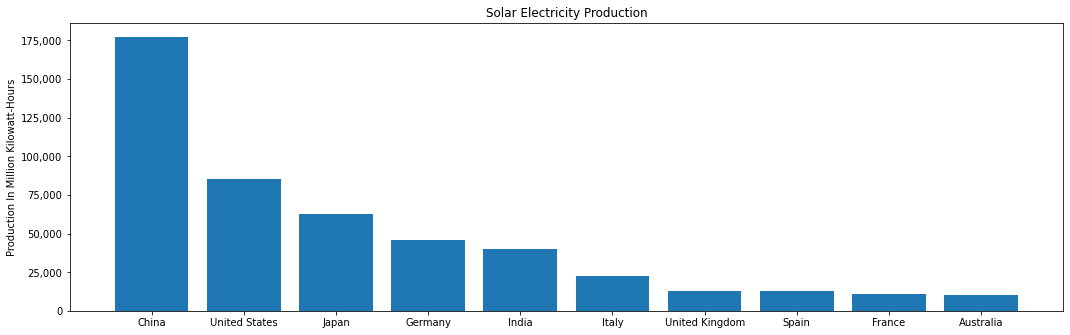

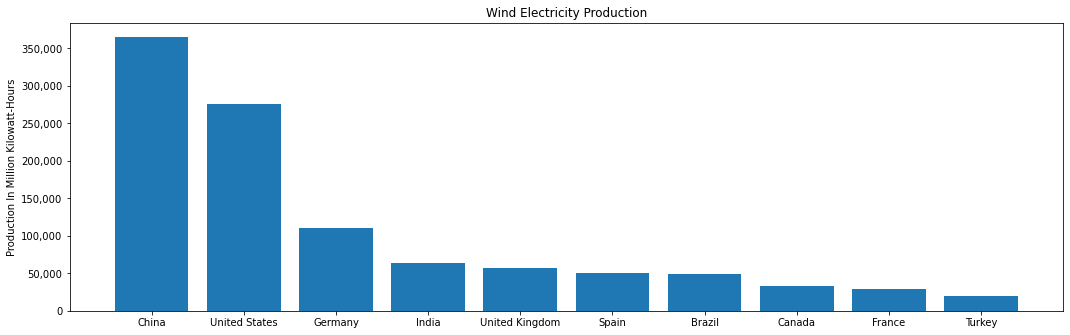

In [28]:
fig = plt.figure()
countries = df_gross_leaders['Country or Area']
production = df_gross_leaders['Gross Quantity']
ax = fig.add_axes([0,0,2.3,1])
ax.bar(countries, production)
ax.set_title("Gross Electricity Production")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Production In Million Kilowatt-Hours")


fig = plt.figure()
countries = df_hydro_leaders['Country or Area']
production = df_hydro_leaders['Hydro Quantity']
ax = fig.add_axes([0,0,2.3,1])
ax.bar(countries, production)
ax.set_title("Hydro Electricity Production")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Production In Million Kilowatt-Hours")

fig = plt.figure()
countries = df_nuclear_leaders['Country or Area']
production = df_nuclear_leaders['Nuclear Quantity']
ax = fig.add_axes([0,0,2.3,1])
ax.bar(countries, production)
ax.set_title("Nuclear Electricity Production")
ax.set_ylabel("Production In Million Kilowatt-Hours")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

fig = plt.figure()
countries = df_solar_leaders['Country or Area']
production = df_solar_leaders['Solar Quantity']
ax = fig.add_axes([0,0,2.3,1])
ax.bar(countries, production)
ax.set_title("Solar Electricity Production")
ax.set_ylabel("Production In Million Kilowatt-Hours")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))


fig = plt.figure()
countries = df_wind_leaders['Country or Area']
production = df_wind_leaders['Wind Quantity']
ax = fig.add_axes([0,0,2.3,1])
ax.bar(countries, production)
ax.set_title("Wind Electricity Production")
ax.set_ylabel("Production In Million Kilowatt-Hours")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));

#### Visualizing Gross Energy Production

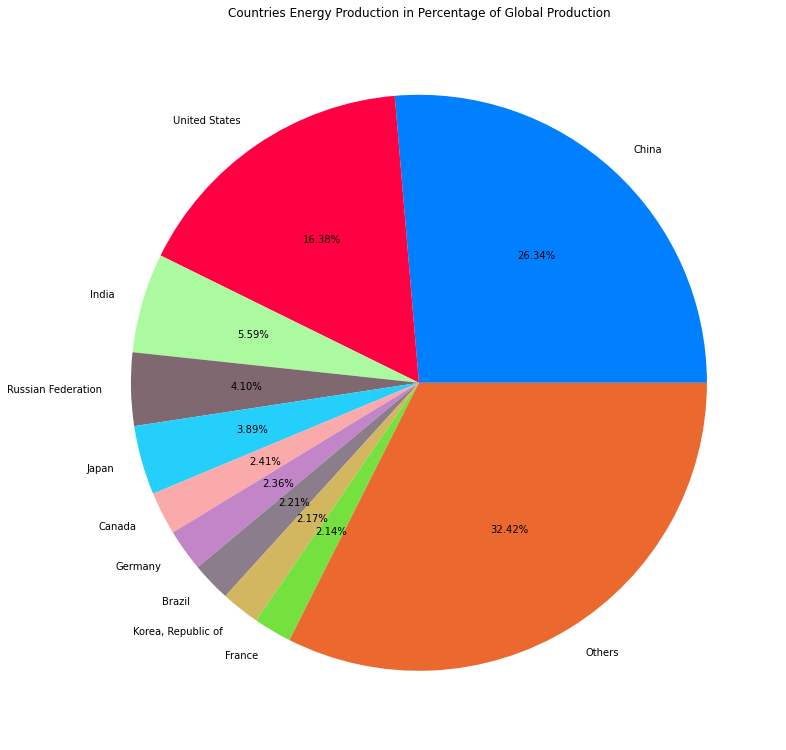

In [29]:

df_gross_sorted = df_gross[df_gross['Year'] == 2018].sort_values(
    'Gross Quantity', ascending=False).reset_index(drop=True)

x = df_gross_sorted.iloc[9:]["Gross Quantity"].sum()
others = pd.DataFrame({'Country or Area': ['Others'], 'Gross Quantity': [x]})
df_leaders_with_others = df_gross_sorted.iloc[:10].filter(['Country or Area', 'Gross Quantity'])
df_leaders_with_others = df_leaders_with_others.append(others, ignore_index=True)


fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2.5])
countries = df_leaders_with_others['Country or Area']
production = df_leaders_with_others['Gross Quantity']
c = ['#0080ff', '#FF0042', '#ACFA9F', '#7F686F', '#25CFFC',
     '#FAAAAA', '#C286C8', '#8B7D8B', '#D2B660', '#75E13F', '#EB692F', '#DF4D5D']

plt.title('Countries Energy Production in Percentage of Global Production')
plt.pie(production, labels = countries,autopct='%1.2f%%', colors=c);




#### Visualizing Gross Hydro Energy Production

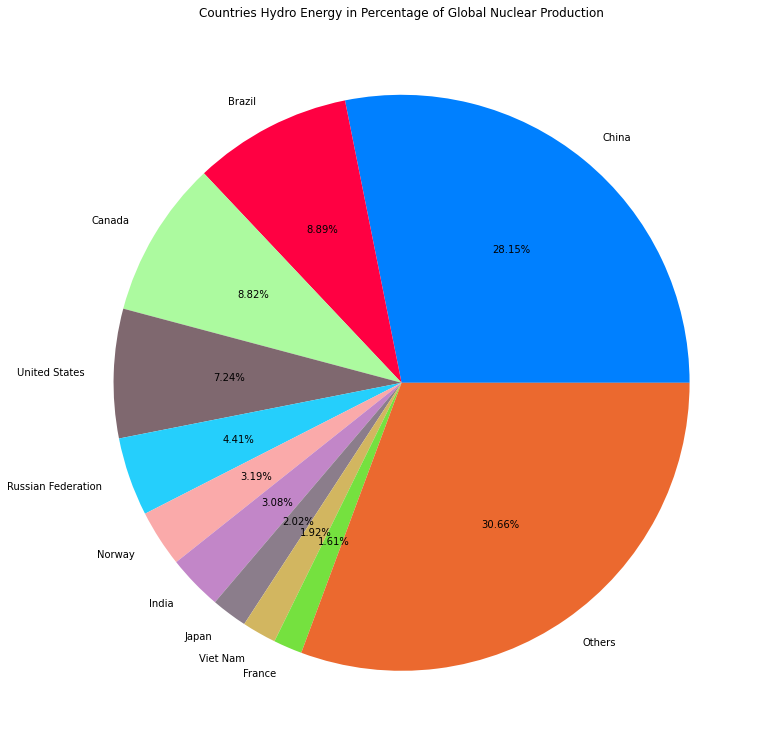

In [8]:

df_hydro_sorted = df_hydro[df_hydro['Year'] == 2018].sort_values('Hydro Quantity', ascending=False).reset_index(drop=True)

x = df_hydro_sorted.iloc[9:]["Hydro Quantity"].sum()
others = pd.DataFrame({'Country or Area': ['Others'], 'Hydro Quantity': [x]})
df_leaders_with_others = df_hydro_sorted.iloc[:10].filter(['Country or Area', 'Hydro Quantity'])
df_leaders_with_others = df_leaders_with_others.append(others, ignore_index=True)

fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2.5])
countries = df_leaders_with_others['Country or Area']
production = df_leaders_with_others['Hydro Quantity']
c = ['#0080ff', '#FF0042', '#ACFA9F', '#7F686F', '#25CFFC',
     '#FAAAAA', '#C286C8', '#8B7D8B', '#D2B660', '#75E13F', '#EB692F', '#DF4D5D']
plt.title('Countries Hydro Energy in Percentage of Global Nuclear Production')
plt.pie(production, labels = countries,autopct='%1.2f%%', colors=c);

#### Visualizing Nuclear Energy Production

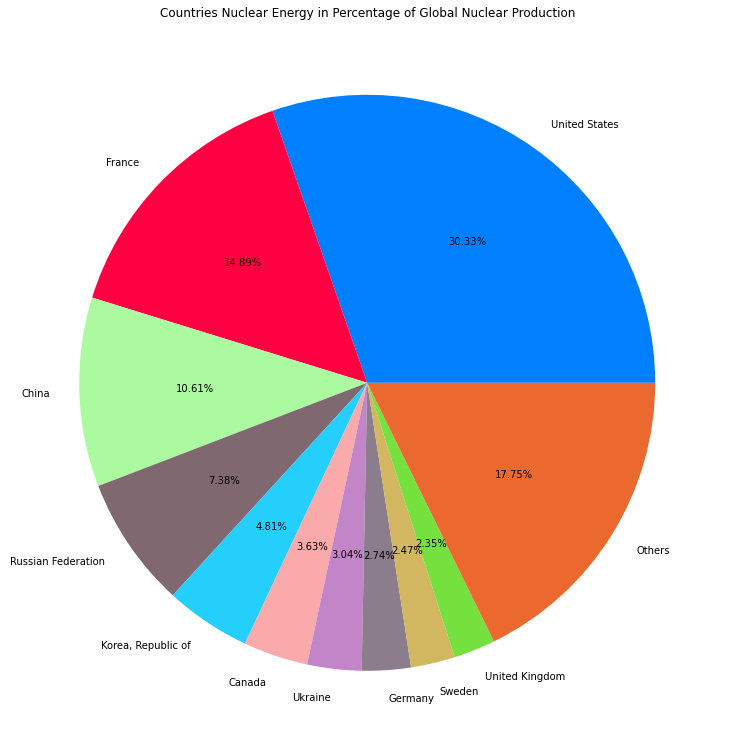

In [9]:
df_nuclear_sorted = df_nuclear[df_nuclear['Year'] == 2018].sort_values('Nuclear Quantity', ascending=False).reset_index(drop=True)

x = df_nuclear_sorted.iloc[9:]["Nuclear Quantity"].sum()
others = pd.DataFrame({'Country or Area': ['Others'], 'Nuclear Quantity': [x]})
df_leaders_with_others = df_nuclear_sorted.iloc[:10].filter(['Country or Area', 'Nuclear Quantity'])
df_leaders_with_others = df_leaders_with_others.append(others, ignore_index=True)

fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2.5])
countries = df_leaders_with_others['Country or Area']
production = df_leaders_with_others['Nuclear Quantity']
c = ['#0080ff', '#FF0042', '#ACFA9F', '#7F686F', '#25CFFC',
     '#FAAAAA', '#C286C8', '#8B7D8B', '#D2B660', '#75E13F', '#EB692F', '#DF4D5D']

plt.title('Countries Nuclear Energy in Percentage of Global Nuclear Production')
plt.pie(production, labels = countries,autopct='%1.2f%%', colors=c);

#### Visualizing Solar Energy Production

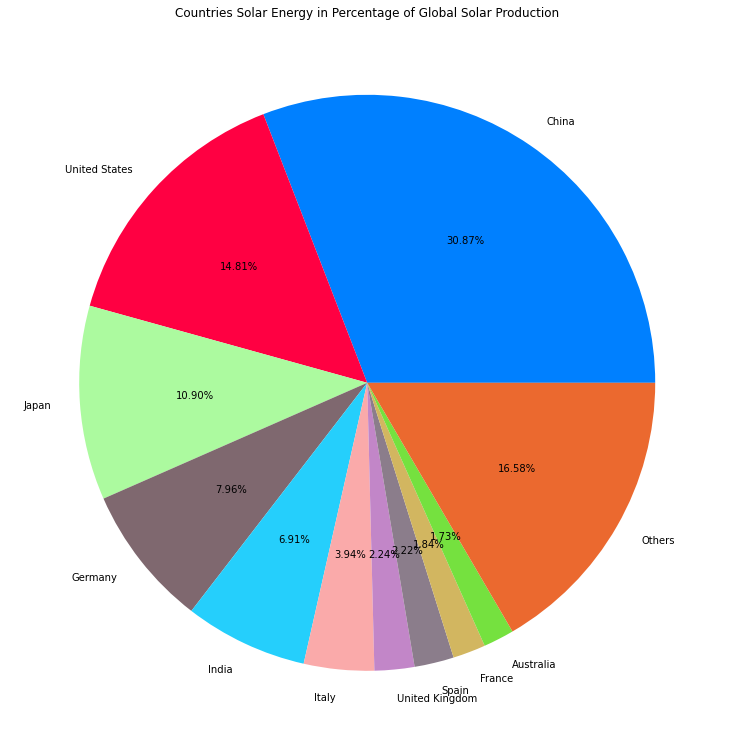

In [10]:
df_solar_sorted = df_solar[df_solar['Year'] == 2018].sort_values('Solar Quantity', ascending=False).reset_index(drop=True)

x = df_solar_sorted.iloc[9:]["Solar Quantity"].sum()
others = pd.DataFrame({'Country or Area': ['Others'], 'Solar Quantity': [x]})
df_leaders_with_others = df_solar_sorted.iloc[:10].filter(['Country or Area', 'Solar Quantity'])
df_leaders_with_others = df_leaders_with_others.append(others, ignore_index=True)

fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2.5])
countries = df_leaders_with_others['Country or Area']
production = df_leaders_with_others['Solar Quantity']
c = ['#0080ff', '#FF0042', '#ACFA9F', '#7F686F', '#25CFFC',
     '#FAAAAA', '#C286C8', '#8B7D8B', '#D2B660', '#75E13F', '#EB692F', '#DF4D5D']

plt.title('Countries Solar Energy in Percentage of Global Solar Production')
plt.pie(production, labels = countries,autopct='%1.2f%%', colors=c);

#### Visualizing Wind Energy Production

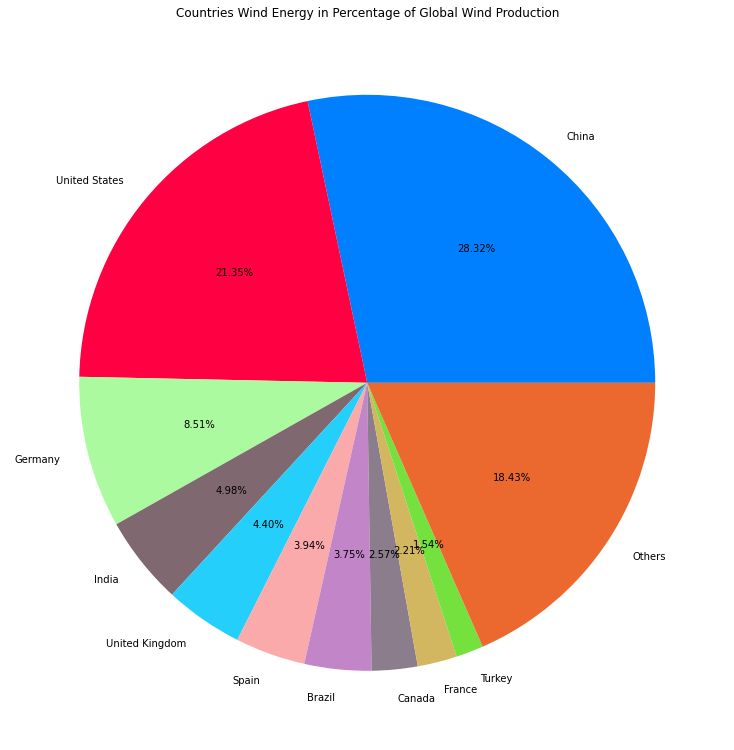

In [11]:
df_wind_sorted = df_wind[df_wind['Year'] == 2018].sort_values('Wind Quantity', ascending=False).reset_index(drop=True)

x = df_wind_sorted.iloc[9:]["Wind Quantity"].sum()
others = pd.DataFrame({'Country or Area': ['Others'], 'Wind Quantity': [x]})
df_leaders_with_others = df_wind_sorted.iloc[:10].filter(['Country or Area', 'Wind Quantity'])
df_leaders_with_others = df_leaders_with_others.append(others, ignore_index=True)

fig = plt.figure()
ax = fig.add_axes([0,0,2.5,2.5])
countries = df_leaders_with_others['Country or Area']
production = df_leaders_with_others['Wind Quantity']
c = ['#0080ff', '#FF0042', '#ACFA9F', '#7F686F', '#25CFFC',
     '#FAAAAA', '#C286C8', '#8B7D8B', '#D2B660', '#75E13F', '#EB692F', '#DF4D5D']

plt.title('Countries Wind Energy in Percentage of Global Wind Production')
plt.pie(production, labels = countries,autopct='%1.2f%%', colors=c);

# Percentage

In [22]:
def getPercentOf(df, s):
    df_percent = pd.merge(df.filter(['Country or Area', 'Year', (s + ' Quantity')]), 
                           df_gross.filter(['Country or Area', 'Year', 'Gross Quantity']), how='inner')

    df_percent[s + ' Percent'] = (df_percent[s + ' Quantity']/df_percent['Gross Quantity'] * 100).round(2)
    return df_percent


df_hydro_percent = getPercentOf(df_hydro, 'Hydro')
df_nuclear_percent = getPercentOf(df_nuclear, 'Nuclear')
df_solar_percent = getPercentOf(df_solar, 'Solar')
df_wind_percent = getPercentOf(df_wind, 'Wind')

df_hydro_percent = df_hydro_percent[df_hydro_percent['Year'] == 2018].sort_values('Hydro Percent',
                                                                       ascending=False).head(10).reset_index(drop=True)
df_nuclear_percent = df_nuclear_percent[df_nuclear_percent['Year'] == 2018].sort_values('Nuclear Percent',
                                                                       ascending=False).head(10).reset_index(drop=True)
df_solar_percent = df_solar_percent[df_solar_percent['Year'] == 2018].sort_values('Solar Percent',
                                                                       ascending=False).head(10).reset_index(drop=True)
df_wind_percent = df_wind_percent[df_wind_percent['Year'] == 2018].sort_values('Wind Percent',
                                                                       ascending=False).head(10).reset_index(drop=True)

print("example dataframe:")
display(df_solar_percent)


example dataframe:


,Country or Area,Year,Solar Quantity,Gross Quantity,Solar Percent
0,Liechtenstein,2018,25.20,89.00,28.31
1,Cook Islands,2018,10.50,41.40,25.36
2,Tuvalu,2018,2.05,8.42,24.35
3,Kiribati,2018,4.90,31.40,15.61
4,State of Palestine,2018,60.00,420.40,14.27
5,St. Helena and Depend.,2018,1.65,11.93,13.83
6,Samoa,2018,21.12,153.55,13.75
7,Namibia,2018,180.00,1363.10,13.21
8,Yemen,2018,458.00,3609.00,12.69
9,Niue,2018,0.47,3.87,12.14


#### Visualizing Percentage Data

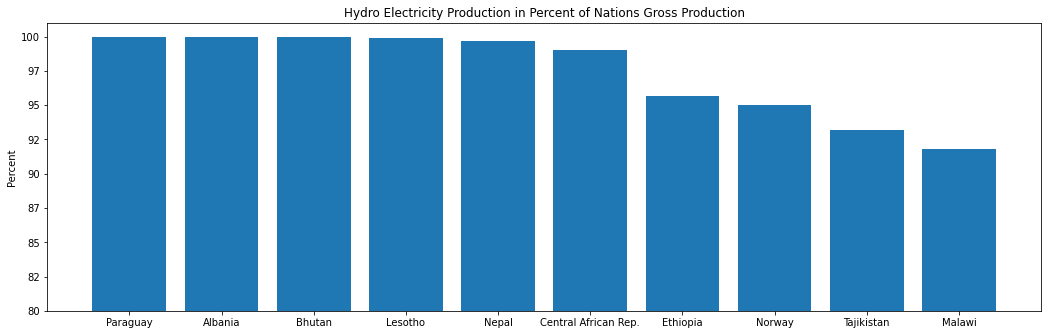

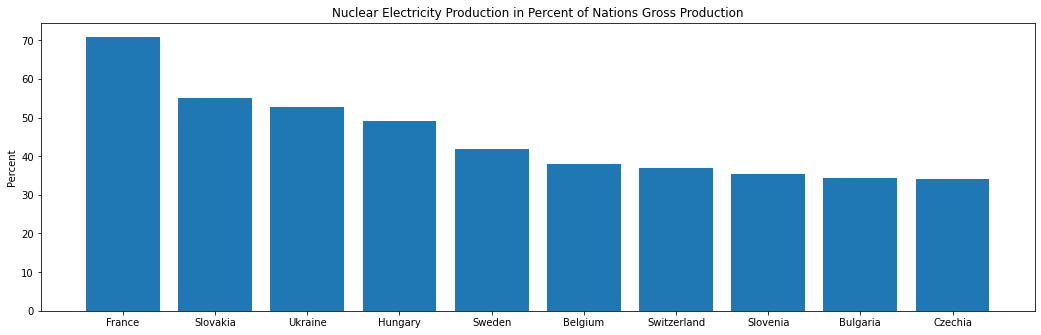

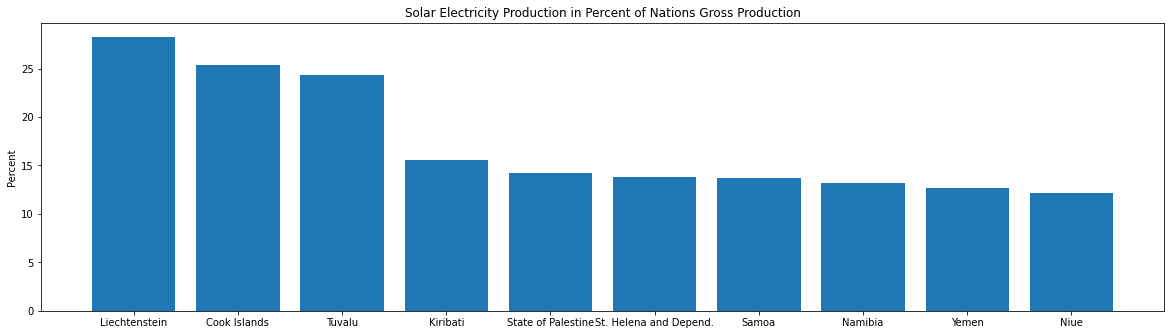

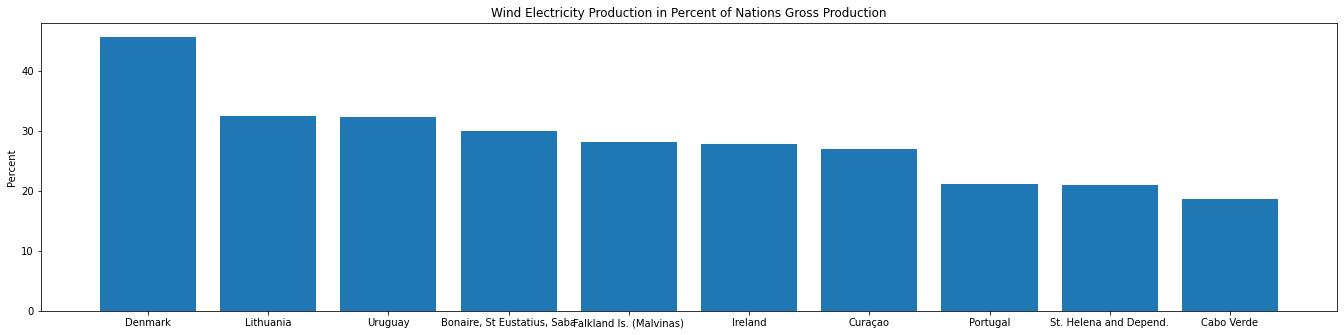

In [13]:
fig = plt.figure()
countries = df_hydro_percent['Country or Area']
production = df_hydro_percent['Hydro Percent']
ax = fig.add_axes([0,0,2.3,1])
ax.bar(countries, production)
ax.set_title("Hydro Electricity Production in Percent of Nations Gross Production")
ax.set_ylabel("Percent")
ax.set_ylim(80,101)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));

fig = plt.figure()
countries = df_nuclear_percent['Country or Area']
production = df_nuclear_percent['Nuclear Percent']
ax = fig.add_axes([0,0,2.3,1])
ax.bar(countries, production)
ax.set_title("Nuclear Electricity Production in Percent of Nations Gross Production")
ax.set_ylabel("Percent")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));

fig = plt.figure()
countries = df_solar_percent['Country or Area']
production = df_solar_percent['Solar Percent']
ax = fig.add_axes([0,0,2.6,1])
ax.bar(countries, production)
ax.set_title("Solar Electricity Production in Percent of Nations Gross Production")
ax.set_ylabel("Percent")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));

fig = plt.figure()
countries = df_wind_percent['Country or Area']
production = df_wind_percent['Wind Percent']
ax = fig.add_axes([0,0,3,1])
ax.bar(countries, production)
ax.set_title("Wind Electricity Production in Percent of Nations Gross Production")
ax.set_ylabel("Percent")
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')));

#### Graphing The United States Through Time

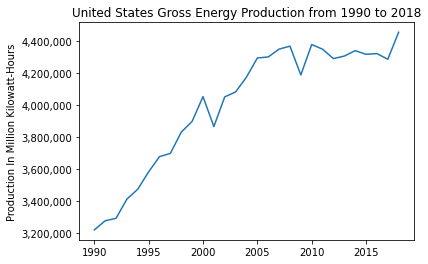

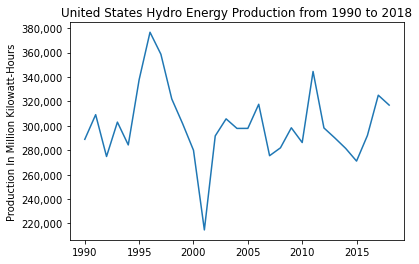

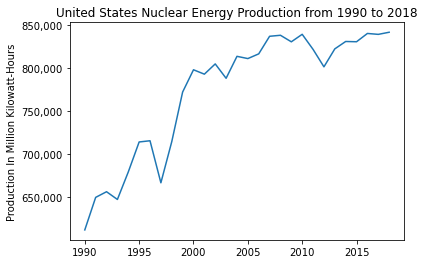

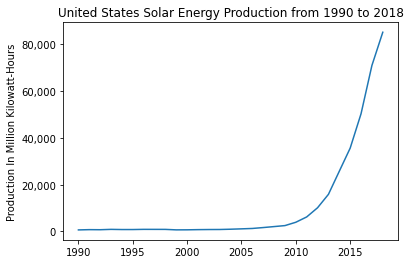

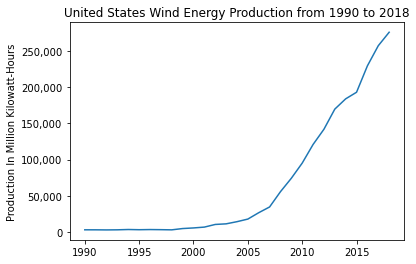

In [14]:
df_us = df_gross[df_gross['Country or Area'] == 'United States']

fig = plt.figure()

plt.title("United States Gross Energy Production from 1990 to 2018")
plt.plot(df_us['Year'], df_us['Gross Quantity'])
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Production In Million Kilowatt-Hours")

fig = plt.figure()
plt.title("United States Hydro Energy Production from 1990 to 2018")
plt.plot(df_hydro[df_hydro['Country or Area'] == 'United States']['Year'],
         df_hydro[df_hydro['Country or Area'] == 'United States']['Hydro Quantity'])
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Production In Million Kilowatt-Hours")

fig = plt.figure()
plt.title("United States Nuclear Energy Production from 1990 to 2018")
plt.plot(df_nuclear[df_nuclear['Country or Area'] == 'United States']['Year'],
         df_nuclear[df_nuclear['Country or Area'] == 'United States']['Nuclear Quantity'])
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Production In Million Kilowatt-Hours")

fig = plt.figure()
plt.title("United States Solar Energy Production from 1990 to 2018")
plt.plot(df_solar[df_solar['Country or Area'] == 'United States']['Year'],
         df_solar[df_solar['Country or Area'] == 'United States']['Solar Quantity'])
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Production In Million Kilowatt-Hours")

fig = plt.figure()
plt.title("United States Wind Energy Production from 1990 to 2018")
plt.plot(df_wind[df_wind['Country or Area'] == 'United States']['Year'],
         df_wind[df_wind['Country or Area'] == 'United States']['Wind Quantity']);
ax = plt.gca()
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Production In Million Kilowatt-Hours");

#### Graphing The Leading Energy Producers Through Time

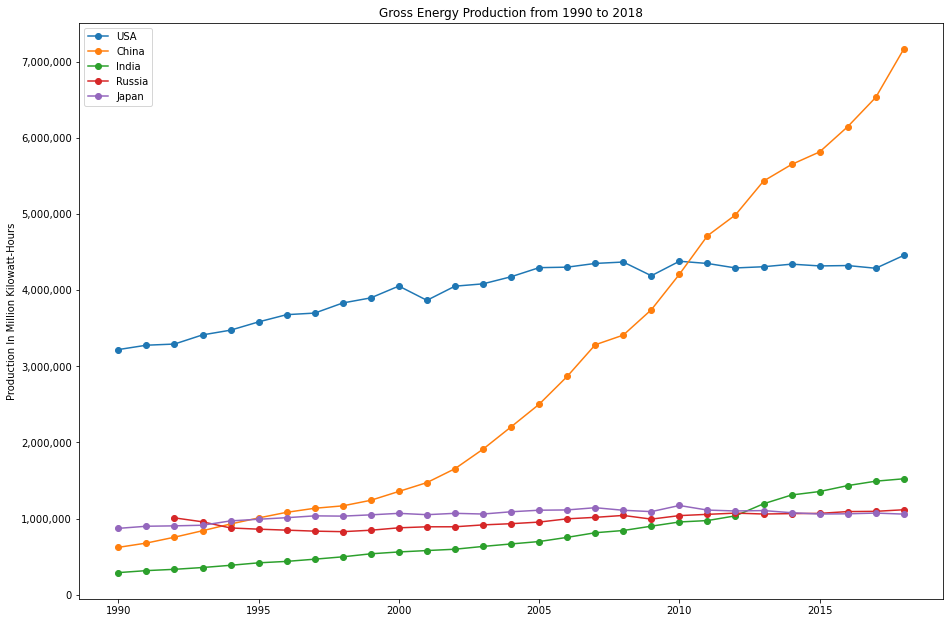

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.set_title("Gross Energy Production from 1990 to 2018")
ax.plot(df_gross[df_gross['Country or Area'] == 'United States']['Year'],
         df_gross[df_gross['Country or Area'] == 'United States']['Gross Quantity'], marker='o', label='USA')

ax.plot(df_gross[df_gross['Country or Area'] == 'China']['Year'],
         df_gross[df_gross['Country or Area'] == 'China']['Gross Quantity'], marker='o', label='China')

ax.plot(df_gross[df_gross['Country or Area'] == 'India']['Year'],
         df_gross[df_gross['Country or Area'] == 'India']['Gross Quantity'], marker='o', label='India')

ax.plot(df_gross[df_gross['Country or Area'] == 'Russian Federation']['Year'],
         df_gross[df_gross['Country or Area'] == 'Russian Federation']['Gross Quantity'], marker='o', label='Russia')

ax.plot(df_gross[df_gross['Country or Area'] == 'Japan']['Year'],
         df_gross[df_gross['Country or Area'] == 'Japan']['Gross Quantity'], marker='o', label='Japan')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylabel("Production In Million Kilowatt-Hours");

#### Graphing Leading Nations in Hydro Power

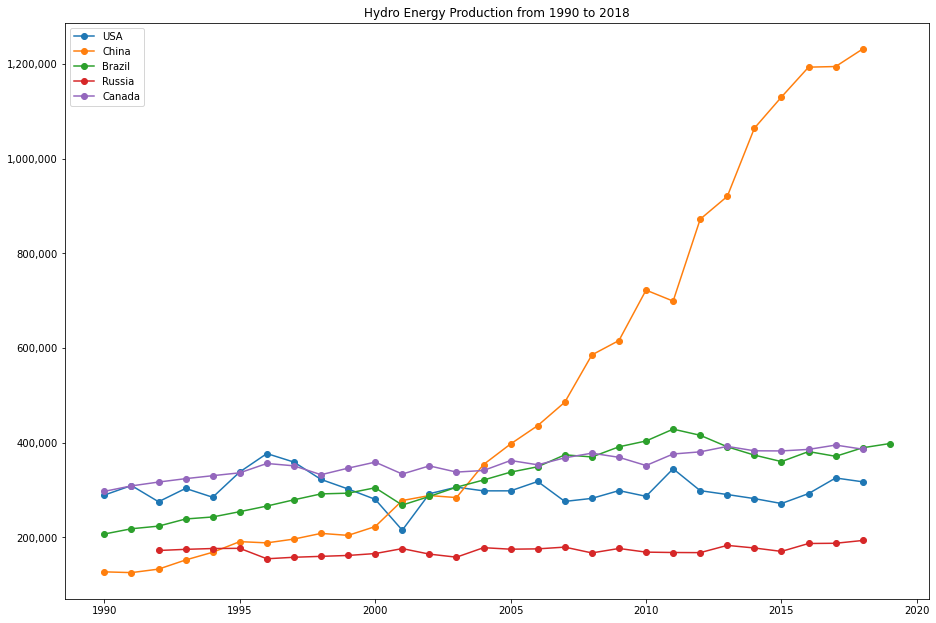

In [16]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.set_title("Hydro Energy Production from 1990 to 2018")
ax.plot(df_hydro[df_hydro['Country or Area'] == 'United States']['Year'],
         df_hydro[df_hydro['Country or Area'] == 'United States']['Hydro Quantity'], marker='o', label='USA')

ax.plot(df_hydro[df_hydro['Country or Area'] == 'China']['Year'],
         df_hydro[df_hydro['Country or Area'] == 'China']['Hydro Quantity'], marker='o', label='China')

ax.plot(df_hydro[df_hydro['Country or Area'] == 'Brazil']['Year'],
         df_hydro[df_hydro['Country or Area'] == 'Brazil']['Hydro Quantity'], marker='o', label='Brazil')

ax.plot(df_hydro[df_hydro['Country or Area'] == 'Russian Federation']['Year'],
         df_hydro[df_hydro['Country or Area'] == 'Russian Federation']['Hydro Quantity'], marker='o', label='Russia')

ax.plot(df_hydro[df_hydro['Country or Area'] == 'Canada']['Year'],
         df_hydro[df_hydro['Country or Area'] == 'Canada']['Hydro Quantity'], marker='o', label='Canada')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#### Graphing Nuclear Power

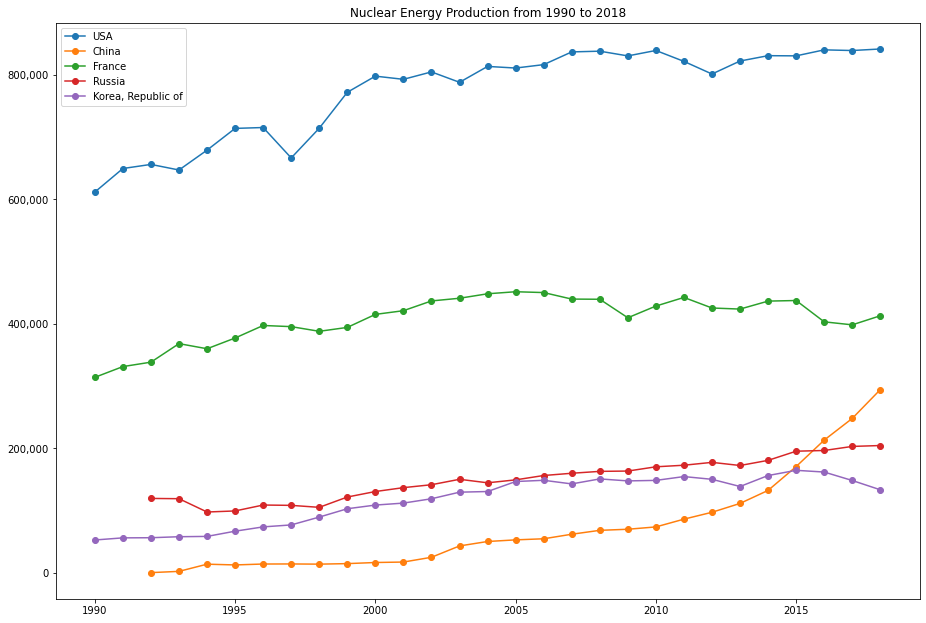

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.set_title("Nuclear Energy Production from 1990 to 2018")
ax.plot(df_nuclear[df_nuclear['Country or Area'] == 'United States']['Year'],
         df_nuclear[df_nuclear['Country or Area'] == 'United States']['Nuclear Quantity'], marker='o', label='USA')

ax.plot(df_nuclear[df_nuclear['Country or Area'] == 'China']['Year'],
         df_nuclear[df_nuclear['Country or Area'] == 'China']['Nuclear Quantity'], marker='o', label='China')

ax.plot(df_nuclear[df_nuclear['Country or Area'] == 'France']['Year'],
         df_nuclear[df_nuclear['Country or Area'] == 'France']['Nuclear Quantity'], marker='o', label='France')

ax.plot(df_nuclear[df_nuclear['Country or Area'] == 'Russian Federation']['Year'],
         df_nuclear[df_nuclear['Country or Area'] == 'Russian Federation']['Nuclear Quantity'], marker='o', label='Russia')

ax.plot(df_nuclear[df_nuclear['Country or Area'] == 'Korea, Republic of']['Year'],
         df_nuclear[df_nuclear['Country or Area'] == 'Korea, Republic of']['Nuclear Quantity'], marker='o', label='Korea, Republic of')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#### Graphing Solar Power

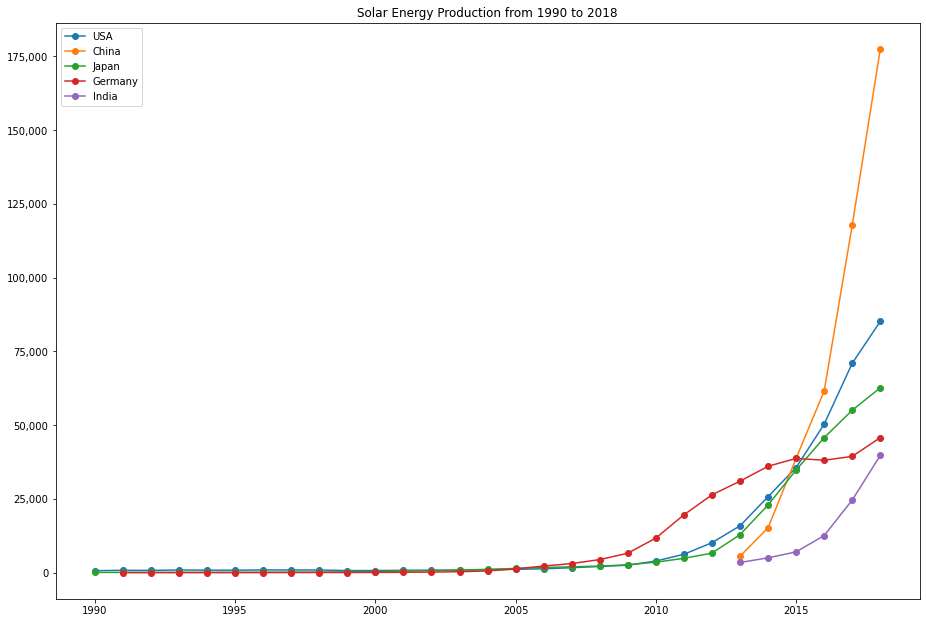

In [18]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.set_title("Solar Energy Production from 1990 to 2018")
ax.plot(df_solar[df_solar['Country or Area'] == 'United States']['Year'],
         df_solar[df_solar['Country or Area'] == 'United States']['Solar Quantity'], marker='o', label='USA')

ax.plot(df_solar[df_solar['Country or Area'] == 'China']['Year'],
         df_solar[df_solar['Country or Area'] == 'China']['Solar Quantity'], marker='o', label='China')

ax.plot(df_solar[df_solar['Country or Area'] == 'Japan']['Year'],
         df_solar[df_solar['Country or Area'] == 'Japan']['Solar Quantity'], marker='o', label='Japan')

ax.plot(df_solar[df_solar['Country or Area'] == 'Germany']['Year'],
         df_solar[df_solar['Country or Area'] == 'Germany']['Solar Quantity'], marker='o', label='Germany')

ax.plot(df_solar[df_solar['Country or Area'] == 'India']['Year'],
         df_solar[df_solar['Country or Area'] == 'India']['Solar Quantity'], marker='o', label='India')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#### Graphing Wind

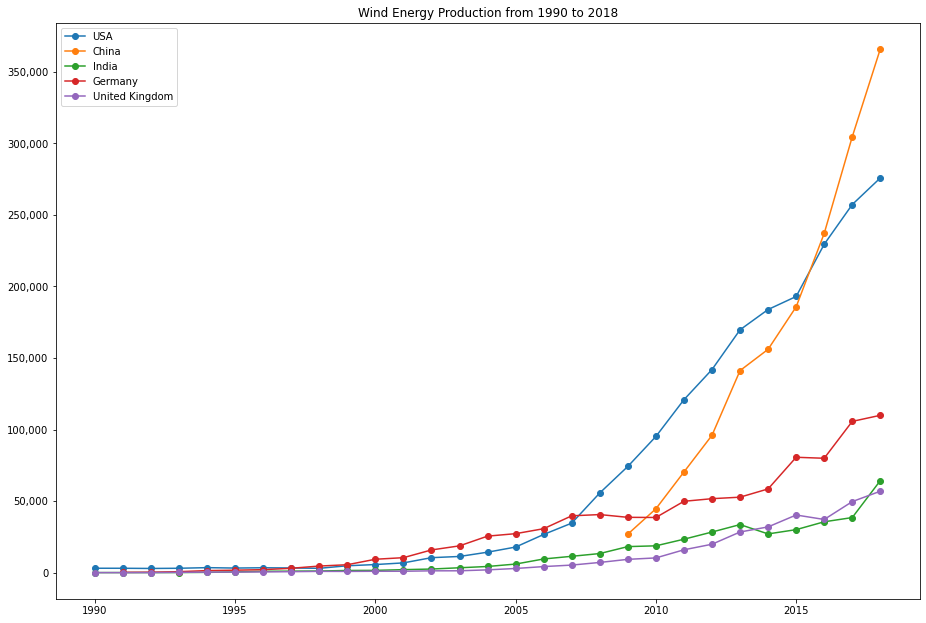

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.set_title("Wind Energy Production from 1990 to 2018")
ax.plot(df_wind[df_wind['Country or Area'] == 'United States']['Year'],
         df_wind[df_wind['Country or Area'] == 'United States']['Wind Quantity'], marker='o', label='USA')

ax.plot(df_wind[df_wind['Country or Area'] == 'China']['Year'],
         df_wind[df_wind['Country or Area'] == 'China']['Wind Quantity'], marker='o', label='China')

ax.plot(df_wind[df_wind['Country or Area'] == 'India']['Year'],
         df_wind[df_wind['Country or Area'] == 'India']['Wind Quantity'], marker='o', label='India')

ax.plot(df_wind[df_wind['Country or Area'] == 'Germany']['Year'],
         df_wind[df_wind['Country or Area'] == 'Germany']['Wind Quantity'], marker='o', label='Germany')

ax.plot(df_wind[df_wind['Country or Area'] == 'United Kingdom']['Year'],
         df_wind[df_wind['Country or Area'] == 'United Kingdom']['Wind Quantity'], marker='o', label='United Kingdom')

ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

#### Greenest Countries

,Country or Area,Year,Gross Quantity,Hydro Quantity,Nuclear Quantity,Solar Quantity,Wind Quantity
0,Afghanistan,2018,1265.72,1065.79,NaN,NaN,NaN
1,Albania,2018,8552.15,8552.15,NaN,NaN,NaN
2,Algeria,2018,76664.00,638.00,NaN,62.00,84.0
3,American Samoa,2018,168.03,NaN,NaN,4.83,NaN
4,Andorra,2018,139.45,118.20,NaN,0.90,NaN
...,...,...,...,...,...,...,...
220,Viet Nam,2018,213121.00,84205.00,NaN,23.00,317.0
221,Wallis and Futuna Is.,2018,20.27,0.34,NaN,0.16,NaN
222,Yemen,2018,3609.00,NaN,NaN,458.00,NaN
223,Zambia,2018,16190.90,12666.00,NaN,0.93,NaN


,Country or Area,Year,Gross Quantity,Total Green,Green Percent
0,Bhutan,2018,6960.47,6960.43,100.00
1,Albania,2018,8552.15,8552.15,100.00
2,Nepal,2018,4913.12,4913.00,100.00
3,Paraguay,2018,59212.45,59210.90,100.00
4,Lesotho,2018,517.27,516.66,99.88
5,Ethiopia,2018,13612.00,13571.00,99.70
6,Central African Rep.,2018,147.43,146.43,99.32
7,Namibia,2018,1363.10,1342.10,98.46
8,Liechtenstein,2018,89.00,87.10,97.87
9,Norway,2018,146889.00,143387.00,97.62


,Country or Area,Year,Gross Quantity,Total Green,Green Percent
0,France,2018,581943.00,522701.00,89.82
1,Canada,2018,654399.00,523661.00,80.02
2,Brazil,2018,601396.00,456581.00,75.92
3,Germany,2018,643159.00,255883.00,39.79
4,Russian Federation,2018,1115093.19,398548.27,35.74
5,United States,2018,4455439.00,1519351.00,34.10
6,China,2018,7166133.00,2069634.00,28.88
7,"Korea, Republic of",2018,590108.00,152448.00,25.83
8,Japan,2018,1057755.00,223426.00,21.12
9,India,2018,1521785.00,276826.00,18.19


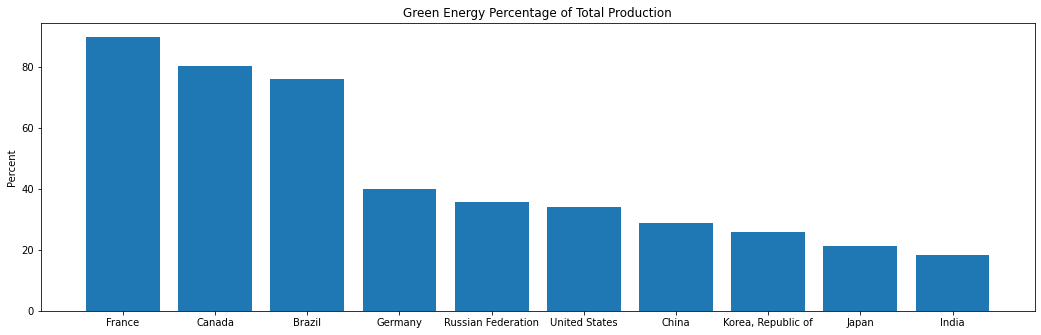

In [20]:
df_green = df_gross[df_gross['Year'] == 2018].filter(['Country or Area', 'Year', 'Gross Quantity'])
df_green = pd.merge(df_green, 
                    df_hydro[df_hydro['Year'] == 2018].filter(['Country or Area', 'Year', 'Hydro Quantity']), how='outer')
df_green = pd.merge(df_green, 
                    df_nuclear[df_nuclear['Year'] == 2018].filter(['Country or Area', 'Year', 'Nuclear Quantity']), how='outer')
df_green = pd.merge(df_green, 
                    df_solar[df_solar['Year'] == 2018].filter(['Country or Area', 'Year', 'Solar Quantity']), how='outer')
df_green = pd.merge(df_green, 
                    df_wind[df_wind['Year'] == 2018].filter(['Country or Area', 'Year', 'Wind Quantity']), how='outer')
display(df_green)

df_green = df_green.fillna(0)
df_green['Total Green'] = (df_green['Hydro Quantity'] + df_green['Nuclear Quantity'] +
                           df_green['Solar Quantity'] + df_green['Wind Quantity'])
df_green= df_green.filter(['Country or Area', 'Year', 'Gross Quantity', 'Total Green'])
df_green['Green Percent'] = (df_green['Total Green'] / df_green['Gross Quantity'] * 100).round(2)

display(df_green.sort_values(
    'Green Percent', ascending=False).reset_index(drop=True).head(20))

df_green = df_green.sort_values(
    'Green Percent', ascending=False).reset_index(drop=True)
df_green_top_10 = df_green[df_green['Country or Area'].isin(df_gross_leaders['Country or Area'])].reset_index(drop=True)

display(df_green_top_10)
fig = plt.figure()
countries = df_green_top_10['Country or Area']
production = df_green_top_10['Green Percent']
ax = fig.add_axes([0,0,2.3,1])
ax.bar(countries, production)
ax.set_title("Green Energy Percentage of Total Production")
ax.set_ylabel("Percent");

#### Predicting Future Global Energy Production

,Year,Gross_Quantity
0,1990,11973610.53
1,1991,12216053.82
2,1992,12293445.51
3,1993,12591066.90
4,1994,12902732.49
...,...,...
24,2014,23971263.22
25,2015,24370885.11
26,2016,24995882.08
27,2017,25621699.50


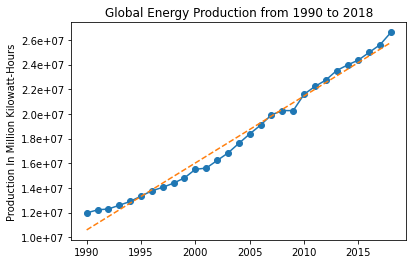

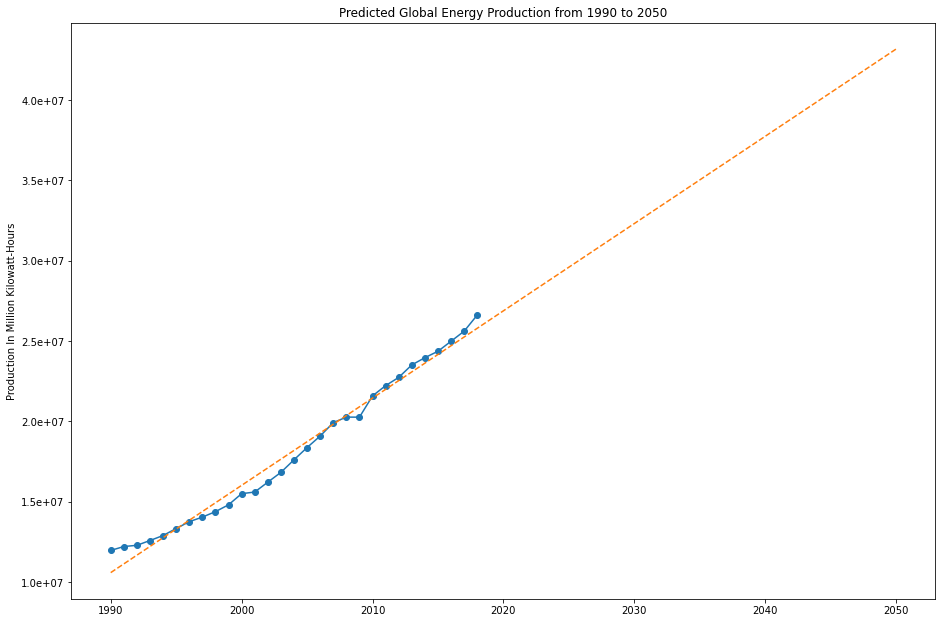

In [21]:
import statsmodels.formula.api as smf

df_global = df_gross.filter(['Year', 'Gross Quantity']).groupby('Year').sum().reset_index()
df_global = df_global.rename(columns={'Gross Quantity' : 'Gross_Quantity'})
df_global = df_global.head(df_global.shape[0] - 1)

df_global

smresults = smf.ols('Gross_Quantity ~ Year', df_global).fit()
df = pd.DataFrame()
df['Year'] = range(1990, 2051)


display(df_global)
fig = plt.figure()
plt.title("Global Energy Production from 1990 to 2018")
plt.plot(df_global['Year'], df_global['Gross_Quantity'], marker='o')
plt.plot(df_global['Year'], smresults.predict(df_global), linestyle='dashed')
ax = plt.gca()
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
ax.set_ylabel("Production In Million Kilowatt-Hours");


fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.plot(df_global['Year'], df_global['Gross_Quantity'], marker='o')
ax.plot(df['Year'], smresults.predict(df), linestyle='dashed')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'));
ax.set_ylabel("Production In Million Kilowatt-Hours");
ax.set_title("Predicted Global Energy Production from 1990 to 2050");